## Assignment 8 - Mortgage Probability of Default & Fraud - Varadharajan Suresh (vs2769)
The goal is to create model to identify loans potential for default. We will get a general understanding of the dataset and create relevant features that can be used later for efficient modeling. For this particular case we will aggregate the data to the loan_default level and card holder level then build various features.

### Data description
A Columbia partner firm has made its loans dataset available for research. The dataset contains 86 attributes with 80000 records. We shall be using all the attributes available in this version.

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df = pd.read_csv("XYZloan_default_selected_vars.csv")

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI


Removing columns that have over 50% null values

In [4]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

TD022 has 19598 null values
TD023 has 7663 null values
TD024 has 3694 null values
TD025 has 2550 null values
TD026 has 1846 null values
TD027 has 1697 null values
TD028 has 1636 null values
TD029 has 1630 null values
TD044 has 79997 null values
TD048 has 79999 null values
TD051 has 79995 null values
TD054 has 79988 null values
TD055 has 79999 null values
TD061 has 79990 null values
TD062 has 79999 null values
PA022 has 381 null values
PA023 has 381 null values
PA028 has 381 null values
PA029 has 381 null values
PA030 has 381 null values
PA031 has 381 null values
CD008 has 381 null values
CD018 has 381 null values
CD071 has 381 null values
CD072 has 381 null values
CD088 has 381 null values
CD100 has 381 null values
CD101 has 381 null values
CD106 has 381 null values
CD107 has 381 null values
CD108 has 381 null values
CD113 has 381 null values
CD114 has 381 null values
CD115 has 381 null values
CD117 has 381 null values
CD118 has 381 null values
CD120 has 381 null values
CD121 has 381 n

In [5]:
df.columns[df.isnull().mean() < 0.5]

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019',
       'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173', 'MB005', 'MB007'],
      dtype='object')

In [6]:
df = df.loc[:,['loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019',
       'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173', 'MB005', 'MB007']]
df.head(2)

,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


Getting the datatypes of variables in order seperate them by type, to in turn perform data cleaning and feature engineering

In [7]:
types = dict(df.dtypes)
for i,j in types.items():
    print(i,":",j)

loan_default : int64
AP001 : int64
AP002 : int64
AP003 : int64
AP004 : int64
AP005 : object
AP006 : object
AP007 : int64
AP008 : int64
AP009 : int64
TD001 : int64
TD002 : int64
TD005 : int64
TD006 : int64
TD009 : int64
TD010 : int64
TD013 : int64
TD014 : int64
TD015 : int64
TD022 : float64
TD023 : float64
TD024 : float64
TD025 : float64
TD026 : float64
TD027 : float64
TD028 : float64
TD029 : float64
CR004 : int64
CR005 : int64
CR009 : int64
CR012 : int64
CR015 : int64
CR017 : int64
CR018 : int64
CR019 : int64
PA022 : float64
PA023 : float64
PA028 : float64
PA029 : float64
PA030 : float64
PA031 : float64
CD008 : float64
CD018 : float64
CD071 : float64
CD072 : float64
CD088 : float64
CD100 : float64
CD101 : float64
CD106 : float64
CD107 : float64
CD108 : float64
CD113 : float64
CD114 : float64
CD115 : float64
CD117 : float64
CD118 : float64
CD120 : float64
CD121 : float64
CD123 : float64
CD130 : float64
CD131 : float64
CD132 : float64
CD133 : float64
CD135 : float64
CD136 : float64
CD137

In [8]:
num = df.select_dtypes(include = ['int64','float64'])
num.head(2)

,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
0,1,31,2,1,12,3,3,1,1,1,...,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0
1,0,27,1,1,12,5,4,0,2,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN


In [9]:
num = num.apply(lambda x: x.fillna(x.median()),axis=0)
num.head(2)

,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
0,1,31,2,1,12,3,3,1,1,1,...,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0
1,0,27,1,1,12,5,4,0,2,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,5.0


In [10]:
obj = df.select_dtypes(include = ['object'])
obj.head(2)

,AP005,AP006,MB007
0,2017/7/6 10:21,ios,IPHONE7
1,2017/4/6 12:51,h5,WEB


In [11]:
obj["AP005"] =  pd.to_datetime(obj["AP005"])
obj['hour'] = obj['AP005'].dt.hour
obj['dayofweek'] = obj['AP005'].dt.dayofweek
obj['day'] = obj['AP005'].dt.day

In [12]:
obj.head(2)

,AP005,AP006,MB007,hour,dayofweek,day
0,2017-07-06 10:21:00,ios,IPHONE7,10,3,6
1,2017-04-06 12:51:00,h5,WEB,12,3,6


In [13]:
obj = obj.iloc[:,[1,3,4,5]]
obj.head(2)

,AP006,hour,dayofweek,day
0,ios,10,3,6
1,h5,12,3,6


One-hot encoding AP006 and removing other highly cardinal categorical variables

In [14]:
obj = pd.get_dummies(obj,prefix="AP006")

In [15]:
obj.head(2)

,hour,dayofweek,day,AP006_android,AP006_api,AP006_h5,AP006_ios
0,10,3,6,0,0,0,1
1,12,3,6,0,0,1,0


In [16]:
df1 = pd.concat([num,obj],axis = 1)
df1.head(2)

,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,...,CD172,CD173,MB005,hour,dayofweek,day,AP006_android,AP006_api,AP006_h5,AP006_ios
0,1,31,2,1,12,3,3,1,1,1,...,2249.0,2249.0,7.0,10,3,6,0,0,0,1
1,0,27,1,1,12,5,4,0,2,0,...,-99.0,-99.0,5.0,12,3,6,0,0,1,0


In [17]:
df1["loan_default"].value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.40, random_state=42)

In [19]:
train.shape

(48000, 83)

In [20]:
var = pd.DataFrame(train.dtypes)
var.head(10)

,0
loan_default,int64
AP001,int64
AP002,int64
AP003,int64
AP004,int64
AP007,int64
AP008,int64
AP009,int64
TD001,int64
TD002,int64


In [21]:
var = pd.DataFrame(train.dtypes).reset_index()
var.columns = ['varname','dtype'] 
var.head(10)

,varname,dtype
0,loan_default,int64
1,AP001,int64
2,AP002,int64
3,AP003,int64
4,AP004,int64
5,AP007,int64
6,AP008,int64
7,AP009,int64
8,TD001,int64
9,TD002,int64


In [22]:
var['source'] = var['varname'].str[:2]
var.head()

,varname,dtype,source
0,loan_default,int64,lo
1,AP001,int64,AP
2,AP002,int64,AP
3,AP003,int64,AP
4,AP004,int64,AP


In [23]:
var['source'].value_counts()

CD    36
TD    17
AP    11
CR     8
PA     6
da     2
lo     1
ho     1
MB     1
Name: source, dtype: int64

In [24]:
# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
AP_list

['AP001',
 'AP002',
 'AP003',
 'AP007',
 'AP008',
 'AP009',
 'AP006_android',
 'AP006_api',
 'AP006_h5',
 'AP006_ios']

In [25]:
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

In [26]:
#!pip install h2o

In [27]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 mins 45 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_Varadharajan_Suresh_w4ed5z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.663 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [28]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [29]:
target='loan_default'

### Learning objective 2: Modeling best practices

* When you model, you should run with a small sample dataset
* Try to write repeating code in a function

### Model 1

In [30]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [31]:
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list 

In [32]:
CR_list

['CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019']

In [33]:
rf_v1 = H2ORandomForestEstimator(
        model_id = 'rf_v1',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v1.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_v1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,300.0,300.0,102903.0,5.0,11.0,7.356667,19.0,25.0,22.42




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.14786499046487325
RMSE: 0.3845321709101506
MAE: 0.29629641080961866
RMSLE: 0.2695652270506315
Mean Residual Deviance: 0.14786499046487325

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.14797310397054808
RMSE: 0.3846727231953782
MAE: 0.2966315061672779
RMSLE: 0.2697000806999532
Mean Residual Deviance: 0.14797310397054808

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.296523,0.010467,0.290254,0.289508,0.299267,0.300410,0.293805,0.315399,0.285755,0.299972,0.281631,0.309231
1,mean_residual_deviance,0.147825,0.011852,0.141029,0.141133,0.152603,0.153389,0.146521,0.168323,0.133073,0.149783,0.130856,0.161544
2,mse,0.147825,0.011852,0.141029,0.141133,0.152603,0.153389,0.146521,0.168323,0.133073,0.149783,0.130856,0.161544
3,r2,0.027376,0.014452,0.008249,0.042084,0.037640,0.035446,0.047684,0.022827,0.009449,0.008730,0.030054,0.031599
4,residual_deviance,0.147825,0.011852,0.141029,0.141133,0.152603,0.153389,0.146521,0.168323,0.133073,0.149783,0.130856,0.161544
5,rmse,0.384204,0.015383,0.375538,0.375677,0.390644,0.391649,0.382781,0.410272,0.364791,0.387019,0.361740,0.401925
6,rmsle,0.269514,0.008041,0.265931,0.263851,0.272090,0.272819,0.267645,0.283540,0.260573,0.272549,0.257442,0.278694



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-11-22 20:01:46,17.606 sec,0.0,NaN,NaN,NaN
1,,2021-11-22 20:01:46,17.611 sec,1.0,0.393681,0.295503,0.154985
2,,2021-11-22 20:01:46,17.614 sec,2.0,0.394190,0.295758,0.155385
3,,2021-11-22 20:01:46,17.618 sec,3.0,0.391103,0.294364,0.152962
4,,2021-11-22 20:01:46,17.622 sec,4.0,0.390016,0.293575,0.152113
5,,2021-11-22 20:01:46,17.626 sec,5.0,0.389427,0.295347,0.151654
6,,2021-11-22 20:01:46,17.629 sec,6.0,0.389121,0.296251,0.151415
7,,2021-11-22 20:01:46,17.633 sec,7.0,0.387647,0.295385,0.150270
8,,2021-11-22 20:01:46,17.636 sec,8.0,0.386951,0.295181,0.149731
9,,2021-11-22 20:01:46,17.644 sec,9.0,0.386383,0.295167,0.149292



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TD013,1509.070801,1.000000,0.171651
1,TD009,1334.577271,0.884370,0.151803
2,TD005,700.101379,0.463929,0.079634
3,AP003,508.654907,0.337065,0.057858
4,TD014,416.834625,0.276219,0.047413
5,MB005,337.684113,0.223770,0.038410
6,TD023,276.750946,0.183392,0.031479
7,CR009,273.410217,0.181178,0.031099
8,CR019,270.013519,0.178927,0.030713
9,AP001,253.509857,0.167991,0.028836



See the whole table with table.as_data_frame()


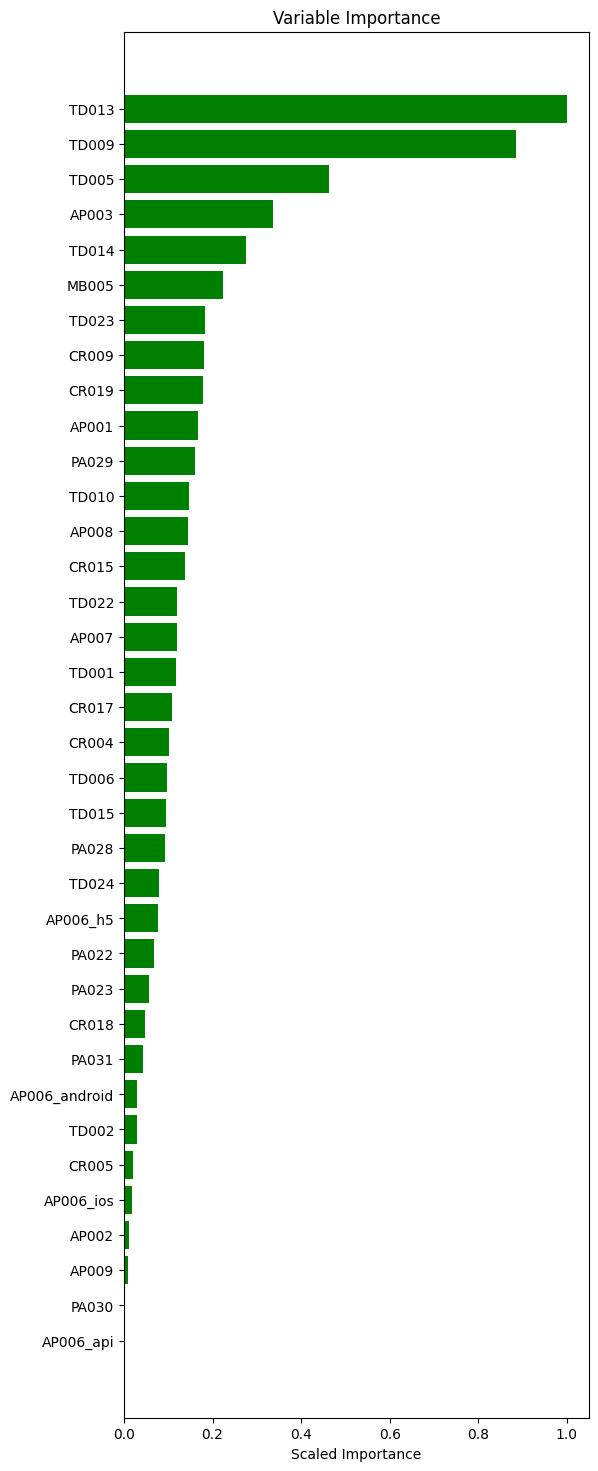

In [34]:
def VarImp(model_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()
    
VarImp(rf_v1)

In [35]:
scaled_importance = list(rf_v1._model_json['output']['variable_importances']['scaled_importance'])
variables = list(rf_v1._model_json['output']['variable_importances']['variable'])

In [36]:
res = dict(zip(variables,scaled_importance))

In [37]:
res

{'TD013': 1.0,
 'TD009': 0.8843702163058872,
 'TD005': 0.4639287825541962,
 'AP003': 0.33706497201008095,
 'TD014': 0.27621939608687957,
 'MB005': 0.2237695622856185,
 'TD023': 0.18339162476780227,
 'CR009': 0.18117785934471137,
 'CR019': 0.17892700537796016,
 'AP001': 0.1679906980152897,
 'PA029': 0.15993616442819578,
 'TD010': 0.1478460676598577,
 'AP008': 0.14372501275651764,
 'CR015': 0.13702766910515415,
 'TD022': 0.119454099914029,
 'AP007': 0.11888293836393657,
 'TD001': 0.11783527800795773,
 'CR017': 0.10795268771818337,
 'CR004': 0.10191928764434602,
 'TD006': 0.09802763974170518,
 'TD015': 0.09493481112103015,
 'PA028': 0.09204543358732042,
 'TD024': 0.08004055553380485,
 'AP006_h5': 0.07625779203203803,
 'PA022': 0.06776013730607586,
 'PA023': 0.05708674100337898,
 'CR018': 0.04755246249324964,
 'PA031': 0.0424186567750941,
 'AP006_android': 0.02983526872571044,
 'TD002': 0.02835929534760014,
 'CR005': 0.019881710448000488,
 'AP006_ios': 0.018791364899256677,
 'AP002': 0.010

In [38]:
def delete_dict(dic):
    l=[]
    for i,j in dic.items():
        if j>=0.10:
            l.append(i)
    return l

In [39]:
final_var = delete_dict(res)
final_var

['TD013',
 'TD009',
 'TD005',
 'AP003',
 'TD014',
 'MB005',
 'TD023',
 'CR009',
 'CR019',
 'AP001',
 'PA029',
 'TD010',
 'AP008',
 'CR015',
 'TD022',
 'AP007',
 'TD001',
 'CR017',
 'CR004']

In [40]:
predictions = rf_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict
0,0,0.268680
1,0,0.153096
2,0,0.123264
3,0,0.158818
4,0,0.120123


In [41]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(rf_v1)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,106,214,320,106,214,0.18,0.08,60.0,1.77,10.0,33.12
1,320,87,233,640,193,447,0.32,0.17,120.0,1.61,15.0,30.16
2,320,73,247,960,266,694,0.44,0.27,180.0,1.48,17.0,27.71
3,320,72,248,1280,338,942,0.56,0.36,240.0,1.41,20.0,26.41
4,320,56,264,1600,394,1206,0.66,0.46,300.0,1.31,20.0,24.62
5,320,52,268,1920,446,1474,0.74,0.57,360.0,1.24,17.0,23.23
6,320,54,266,2240,500,1740,0.83,0.67,420.0,1.19,16.0,22.32
7,320,44,276,2560,544,2016,0.91,0.78,480.0,1.13,13.0,21.25
8,320,40,280,2880,584,2296,0.97,0.88,540.0,1.08,9.0,20.28


In [42]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



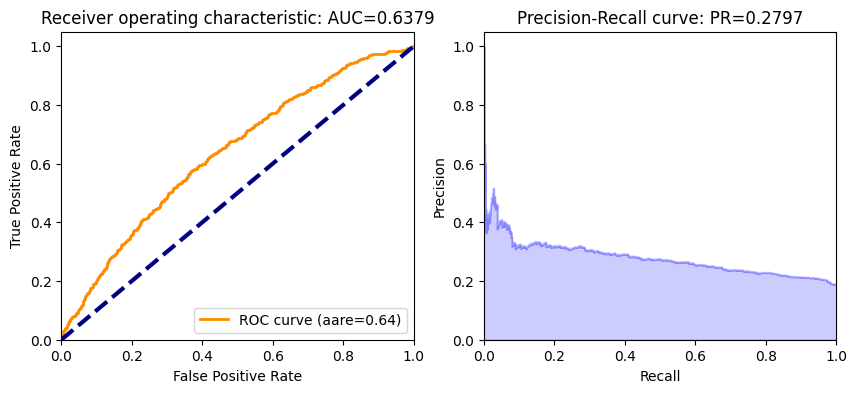

In [43]:
ROC_AUC(rf_v1,test_hex,'loan_default')

### Model 2 : Now the code works fine with the small dataset, we can model with the entire dataset
Since the model works well for the fraction of the original dataset, one can now run the model over the entire dataset. H2o requires to convert pandas datafram to H2o dataframe before running the model.

In [44]:
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
rf_v2 = H2ORandomForestEstimator(
        model_id = 'rf_v2',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v2.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_v2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,300.0,300.0,862015.0,12.0,19.0,14.343333,213.0,233.0,223.33667




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.14792424824477113
RMSE: 0.384609214976411
MAE: 0.29735322184582863
RMSLE: 0.2695897724672582
Mean Residual Deviance: 0.14792424824477113

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.1479770685032358
RMSE: 0.38467787628512745
MAE: 0.29754125199477516
RMSLE: 0.2696339140615883
Mean Residual Deviance: 0.1479770685032358

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.297540,0.003807,0.296577,0.294539,0.299924,0.302443,0.299592,0.290386,0.294125,0.301838,0.299539,0.296433
1,mean_residual_deviance,0.147976,0.003991,0.145871,0.144680,0.150355,0.152865,0.151358,0.141448,0.143375,0.151964,0.150588,0.147256
2,mse,0.147976,0.003991,0.145871,0.144680,0.150355,0.152865,0.151358,0.141448,0.143375,0.151964,0.150588,0.147256
3,r2,0.049676,0.005365,0.053946,0.046847,0.057200,0.052652,0.043339,0.054811,0.049148,0.045368,0.041043,0.052407
4,residual_deviance,0.147976,0.003991,0.145871,0.144680,0.150355,0.152865,0.151358,0.141448,0.143375,0.151964,0.150588,0.147256
5,rmse,0.384645,0.005198,0.381931,0.380368,0.387756,0.390980,0.389047,0.376096,0.378648,0.389825,0.388057,0.383740
6,rmsle,0.269621,0.002863,0.268199,0.267452,0.270830,0.272814,0.272147,0.264521,0.266712,0.272601,0.271918,0.269015



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-11-22 20:06:17,2 min 55.763 sec,0.0,NaN,NaN,NaN
1,,2021-11-22 20:06:17,2 min 55.815 sec,1.0,0.392043,0.297463,0.153698
2,,2021-11-22 20:06:17,2 min 55.874 sec,2.0,0.390522,0.298295,0.152507
3,,2021-11-22 20:06:17,2 min 55.910 sec,3.0,0.388967,0.297618,0.151295
4,,2021-11-22 20:06:17,2 min 55.964 sec,4.0,0.388513,0.297587,0.150942
5,,2021-11-22 20:06:17,2 min 56.014 sec,5.0,0.388091,0.297579,0.150615
6,,2021-11-22 20:06:17,2 min 56.064 sec,6.0,0.387641,0.297258,0.150266
7,,2021-11-22 20:06:17,2 min 56.097 sec,7.0,0.387192,0.297330,0.149917
8,,2021-11-22 20:06:17,2 min 56.146 sec,8.0,0.387160,0.297447,0.149893
9,,2021-11-22 20:06:17,2 min 56.221 sec,9.0,0.386948,0.297442,0.149729



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TD013,16535.666016,1.000000,0.149425
1,AP003,14614.161133,0.883796,0.132061
2,TD009,13713.277344,0.829315,0.123920
3,TD005,8054.427246,0.487094,0.072784
4,MB005,6277.744141,0.379649,0.056729
5,CR015,5085.464355,0.307545,0.045955
6,TD014,4734.619629,0.286328,0.042784
7,PA028,2875.147217,0.173876,0.025981
8,AP007,2465.293945,0.149089,0.022278
9,TD023,2403.487793,0.145352,0.021719



See the whole table with table.as_data_frame()


In [46]:
createGains(rf_v2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1206,1994,3200,1206,1994,0.19,0.08,622.4,1.94,11.0,37.69
1,3200,927,2273,6400,2133,4267,0.34,0.17,1244.8,1.71,17.0,33.33
2,3200,834,2366,9600,2967,6633,0.48,0.26,1867.2,1.59,22.0,30.91
3,3200,697,2503,12800,3664,9136,0.59,0.35,2489.6,1.47,24.0,28.62
4,3200,608,2592,16000,4272,11728,0.69,0.45,3112.0,1.37,24.0,26.70
5,3200,545,2655,19200,4817,14383,0.77,0.56,3734.4,1.29,21.0,25.09
6,3200,468,2732,22400,5285,17115,0.85,0.66,4356.8,1.21,19.0,23.59
7,3200,392,2808,25600,5677,19923,0.91,0.77,4979.2,1.14,14.0,22.18
8,3200,341,2859,28800,6018,22782,0.97,0.88,5601.6,1.07,9.0,20.90


AUC for both the curves are decent. We are more concerned with improving the AUC for precision recall curve, given the problem in hand. The model below is run using all the variables in the dataset.

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



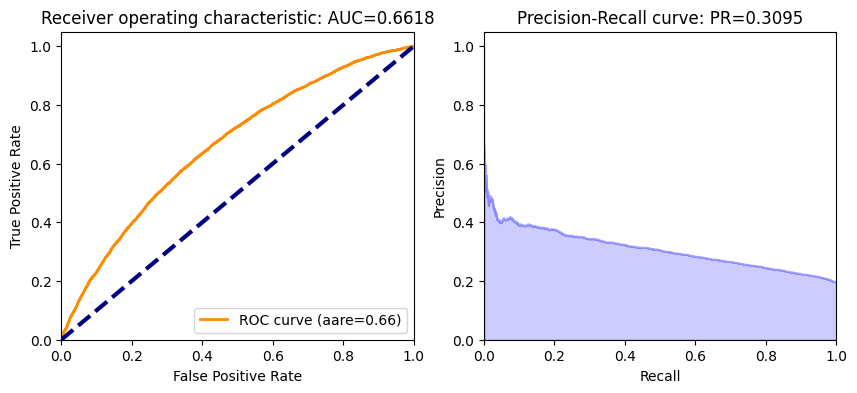

In [47]:
ROC_AUC(rf_v2,test_hex,'loan_default')

### Model 3
After removing features post feature importance evaluation, with a threshold of 0.10.

In [48]:
train = train.loc[:,['loan_default','TD013',
 'TD009',
 'TD005',
 'AP003',
 'TD014',
 'MB005',
 'TD023',
 'CR009',
 'CR019',
 'AP001',
 'PA029',
 'TD010',
 'AP008',
 'CR015',
 'TD022',
 'AP007',
 'TD001',
 'CR017',
 'CR004']]

In [49]:
test = test.loc[:,['loan_default','TD013',
 'TD009',
 'TD005',
 'AP003',
 'TD014',
 'MB005',
 'TD023',
 'CR009',
 'CR019',
 'AP001',
 'PA029',
 'TD010',
 'AP008',
 'CR015',
 'TD022',
 'AP007',
 'TD001',
 'CR017',
 'CR004']]

In [50]:
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [51]:
predictors = ['TD013',
 'TD009',
 'TD005',
 'AP003',
 'TD014',
 'MB005',
 'TD023',
 'CR009',
 'CR019',
 'AP001',
 'PA029',
 'TD010',
 'AP008',
 'CR015',
 'TD022',
 'AP007',
 'TD001',
 'CR017',
 'CR004']

In [52]:
rf_v3 = H2ORandomForestEstimator(
        model_id = 'rf_v3',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v3.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_v3


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,300.0,300.0,852525.0,11.0,20.0,14.37,212.0,230.0,221.09




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.14832029975729488
RMSE: 0.3851237460314475
MAE: 0.2978551659582714
RMSLE: 0.2700058927286509
Mean Residual Deviance: 0.14832029975729488

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.14836713296237589
RMSE: 0.3851845440336046
MAE: 0.2980037776836001
RMSLE: 0.27002517354193173
Mean Residual Deviance: 0.14836713296237589

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.298003,0.003799,0.297078,0.295191,0.300650,0.302573,0.300089,0.290599,0.294703,0.302245,0.299996,0.296903
1,mean_residual_deviance,0.148366,0.003986,0.146276,0.145152,0.150855,0.153303,0.151674,0.141718,0.143901,0.152310,0.150912,0.147558
2,mse,0.148366,0.003986,0.146276,0.145152,0.150855,0.153303,0.151674,0.141718,0.143901,0.152310,0.150912,0.147558
3,r2,0.047169,0.005251,0.051321,0.043734,0.054060,0.049940,0.041342,0.053004,0.045656,0.043189,0.038986,0.050463
4,residual_deviance,0.148366,0.003986,0.146276,0.145152,0.150855,0.153303,0.151674,0.141718,0.143901,0.152310,0.150912,0.147558
5,rmse,0.385152,0.005186,0.382460,0.380988,0.388401,0.391539,0.389453,0.376455,0.379343,0.390270,0.388473,0.384133
6,rmsle,0.270012,0.002846,0.268627,0.268005,0.271355,0.273194,0.272458,0.264768,0.267260,0.272951,0.272210,0.269293



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-11-22 20:09:22,1 min 56.392 sec,0.0,NaN,NaN,NaN
1,,2021-11-22 20:09:22,1 min 56.408 sec,1.0,0.391116,0.297016,0.152971
2,,2021-11-22 20:09:22,1 min 56.442 sec,2.0,0.389190,0.297085,0.151469
3,,2021-11-22 20:09:22,1 min 56.460 sec,3.0,0.388553,0.297622,0.150974
4,,2021-11-22 20:09:22,1 min 56.494 sec,4.0,0.388211,0.297851,0.150708
5,,2021-11-22 20:09:22,1 min 56.510 sec,5.0,0.387913,0.297883,0.150477
6,,2021-11-22 20:09:22,1 min 56.548 sec,6.0,0.387308,0.297459,0.150008
7,,2021-11-22 20:09:23,1 min 56.578 sec,7.0,0.386939,0.297354,0.149721
8,,2021-11-22 20:09:23,1 min 56.609 sec,8.0,0.387103,0.297558,0.149849
9,,2021-11-22 20:09:23,1 min 56.640 sec,9.0,0.386883,0.297607,0.149679



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TD013,19040.044922,1.000000,0.184418
1,AP003,15006.860352,0.788174,0.145353
2,TD009,12790.068359,0.671746,0.123882
3,TD005,8810.529297,0.462737,0.085337
4,MB005,6495.014648,0.341124,0.062909
5,CR015,5699.509277,0.299343,0.055204
6,TD014,5517.938965,0.289807,0.053446
7,PA029,4952.588379,0.260114,0.047970
8,TD010,3020.976807,0.158664,0.029261
9,AP001,2825.843994,0.148416,0.027371


In [53]:
createGains(rf_v3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1177,2023,3200,1177,2023,0.19,0.08,622.4,1.89,11.0,36.78
1,3200,950,2250,6400,2127,4273,0.34,0.17,1244.8,1.71,17.0,33.23
2,3200,830,2370,9600,2957,6643,0.48,0.26,1867.2,1.58,22.0,30.80
3,3200,666,2534,12800,3623,9177,0.58,0.36,2489.6,1.46,22.0,28.30
4,3200,634,2566,16000,4257,11743,0.68,0.46,3112.0,1.37,22.0,26.61
5,3200,518,2682,19200,4775,14425,0.77,0.56,3734.4,1.28,21.0,24.87
6,3200,460,2740,22400,5235,17165,0.84,0.67,4356.8,1.20,17.0,23.37
7,3200,435,2765,25600,5670,19930,0.91,0.77,4979.2,1.14,14.0,22.15
8,3200,333,2867,28800,6003,22797,0.96,0.88,5601.6,1.07,8.0,20.84


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



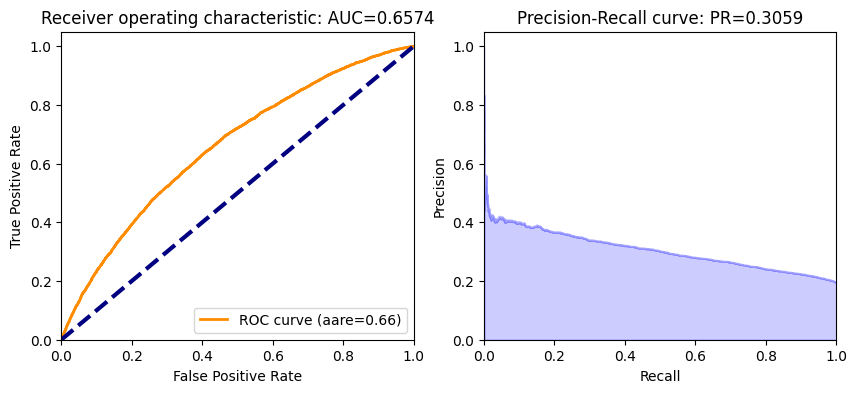

In [54]:
ROC_AUC(rf_v3,test_hex,'loan_default')

### Model 4
including categorical variables to the mix.

In [55]:
train, test = train_test_split(df1, test_size=0.40, random_state=42)

In [56]:
train = train.loc[:,['loan_default','TD013','AP006_android','AP006_api','AP006_h5','AP006_ios',
 'TD009',
 'TD005',
 'AP003',
 'TD014',
 'MB005',
 'TD023',
 'CR009',
 'CR019',
 'AP001',
 'PA029',
 'TD010',
 'AP008',
 'CR015',
 'TD022',
 'AP007',
 'TD001',
 'CR017',
 'CR004']]

In [57]:
test = test.loc[:,['loan_default','TD013','AP006_android','AP006_api','AP006_h5','AP006_ios',
 'TD009',
 'TD005',
 'AP003',
 'TD014',
 'MB005',
 'TD023',
 'CR009',
 'CR019',
 'AP001',
 'PA029',
 'TD010',
 'AP008',
 'CR015',
 'TD022',
 'AP007',
 'TD001',
 'CR017',
 'CR004']]

In [58]:
predictors = ['TD013','AP006_android','AP006_api','AP006_h5','AP006_ios',
 'TD009',
 'TD005',
 'AP003',
 'TD014',
 'MB005',
 'TD023',
 'CR009',
 'CR019',
 'AP001',
 'PA029',
 'TD010',
 'AP008',
 'CR015',
 'TD022',
 'AP007',
 'TD001',
 'CR017',
 'CR004']

In [59]:
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [60]:
rf_v4 = H2ORandomForestEstimator(
        model_id = 'rf_v4',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v4.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_v4


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,300.0,300.0,851825.0,12.0,18.0,14.233334,211.0,232.0,220.81334




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.14812073164566053
RMSE: 0.3848645627303981
MAE: 0.2976738783881551
RMSLE: 0.26978507923046907
Mean Residual Deviance: 0.14812073164566053

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.1481629023352427
RMSE: 0.384919345233833
MAE: 0.2978450805874523
RMSLE: 0.2698172206053937
Mean Residual Deviance: 0.1481629023352427

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.297844,0.003818,0.296434,0.294999,0.300315,0.302301,0.300118,0.290279,0.294980,0.302291,0.299818,0.296901
1,mean_residual_deviance,0.148162,0.003971,0.145869,0.144988,0.150687,0.152801,0.151563,0.141555,0.143743,0.152226,0.150782,0.147404
2,mse,0.148162,0.003971,0.145869,0.144988,0.150687,0.152801,0.151563,0.141555,0.143743,0.152226,0.150782,0.147404
3,r2,0.048478,0.005687,0.053958,0.044816,0.055115,0.053051,0.042044,0.054095,0.046707,0.043721,0.039813,0.051455
4,residual_deviance,0.148162,0.003971,0.145869,0.144988,0.150687,0.152801,0.151563,0.141555,0.143743,0.152226,0.150782,0.147404
5,rmse,0.384887,0.005170,0.381928,0.380773,0.388184,0.390898,0.389311,0.376238,0.379134,0.390161,0.388306,0.383932
6,rmsle,0.269804,0.002852,0.268130,0.267826,0.271143,0.272682,0.272394,0.264552,0.267172,0.272894,0.272088,0.269161



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-11-22 20:12:37,2 min 9.756 sec,0.0,NaN,NaN,NaN
1,,2021-11-22 20:12:37,2 min 9.804 sec,1.0,0.390587,0.296805,0.152558
2,,2021-11-22 20:12:37,2 min 9.833 sec,2.0,0.389128,0.297244,0.151421
3,,2021-11-22 20:12:37,2 min 9.869 sec,3.0,0.387754,0.296766,0.150353
4,,2021-11-22 20:12:37,2 min 9.899 sec,4.0,0.387637,0.297177,0.150262
5,,2021-11-22 20:12:37,2 min 9.927 sec,5.0,0.387687,0.297560,0.150301
6,,2021-11-22 20:12:37,2 min 9.944 sec,6.0,0.387151,0.297369,0.149886
7,,2021-11-22 20:12:37,2 min 9.991 sec,7.0,0.386960,0.297513,0.149738
8,,2021-11-22 20:12:37,2 min 10.025 sec,8.0,0.387172,0.297699,0.149903
9,,2021-11-22 20:12:37,2 min 10.056 sec,9.0,0.387062,0.297792,0.149817



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TD013,17054.904297,1.000000,0.164370
1,AP003,14609.648438,0.856624,0.140804
2,TD009,13254.559570,0.777170,0.127744
3,TD005,9094.027344,0.533221,0.087646
4,MB005,6426.627930,0.376820,0.061938
5,CR015,5463.777344,0.320364,0.052658
6,TD014,5111.909668,0.299733,0.049267
7,PA029,4642.167969,0.272190,0.044740
8,TD010,3261.375244,0.191228,0.031432
9,AP001,2732.866455,0.160239,0.026339



See the whole table with table.as_data_frame()


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



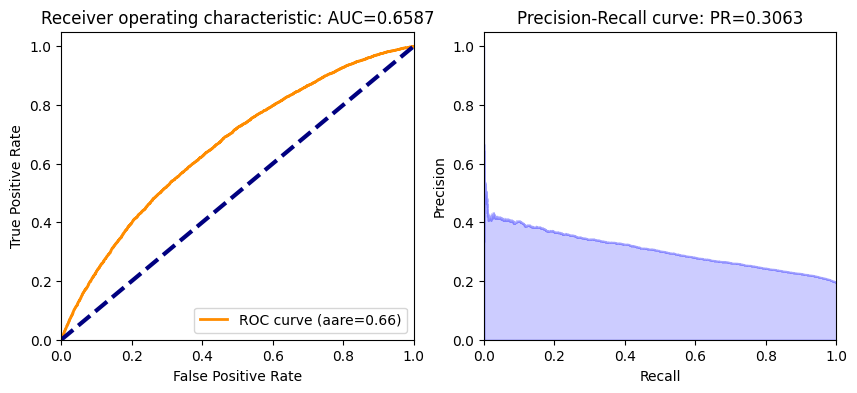

In [61]:
ROC_AUC(rf_v4,test_hex,'loan_default')

In [62]:
createGains(rf_v4)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1183,2017,3200,1183,2017,0.19,0.08,622.4,1.90,11.0,36.97
1,3200,952,2248,6400,2135,4265,0.34,0.17,1244.8,1.72,17.0,33.36
2,3200,821,2379,9600,2956,6644,0.47,0.26,1867.2,1.58,21.0,30.79
3,3200,666,2534,12800,3622,9178,0.58,0.36,2489.6,1.45,22.0,28.30
4,3200,618,2582,16000,4240,11760,0.68,0.46,3112.0,1.36,22.0,26.50
5,3200,547,2653,19200,4787,14413,0.77,0.56,3734.4,1.28,21.0,24.93
6,3200,464,2736,22400,5251,17149,0.84,0.67,4356.8,1.21,17.0,23.44
7,3200,420,2780,25600,5671,19929,0.91,0.77,4979.2,1.14,14.0,22.15
8,3200,340,2860,28800,6011,22789,0.97,0.88,5601.6,1.07,9.0,20.87


In [63]:
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list + time
tr.dtypes

NameError: name 'time' is not defined

In [64]:
tr = train.copy().reset_index()
tr.head()

,index,loan_default,TD013,AP006_android,AP006_api,AP006_h5,AP006_ios,TD009,TD005,AP003,...,AP001,PA029,TD010,AP008,CR015,TD022,AP007,TD001,CR017,CR004
0,36421,1,8,0,0,1,0,8,5,1,...,33,136.000000,4,2,6,15.0,5,1,8,4
1,41239,0,3,0,0,1,0,3,2,4,...,26,-98.000000,2,1,5,10.0,1,2,7,1
2,1727,0,4,0,0,1,0,4,2,1,...,34,-98.000000,2,3,6,10.0,3,1,4,1
3,69197,0,6,0,0,1,0,6,6,3,...,31,58.333333,1,4,5,30.0,4,6,7,3
4,25292,1,9,0,0,1,0,8,7,1,...,36,-98.000000,1,4,5,10.0,4,1,6,4


In [65]:
tr_hex = h2o.H2OFrame(tr)
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [66]:
tr_hex["loan_default"]=tr_hex["loan_default"].asfactor()

Selecting Hyperparameters using grid search

Grid search enables us to test the model on various specified hyperparameters in order to hget the best performing model and hyperparameters. Before setting up the grid and its criterion, it is important to split the train set into train and validation set.

In [67]:
train1, valid = tr_hex.split_frame(ratios=[.8])

The grid search is being performed over various combinations of number of trees and max depth of the trees. A lot more parameters can be added to the grid, but computational time and complexity get is a concern. For this assignment, I am keeping it simple and testing a few parameters. When the dataset is large, random discrete grid search works best, keeping runtime in mind.

In [68]:
from h2o.grid.grid_search import H2OGridSearch
estimator = H2ORandomForestEstimator(
    # Stops fitting new trees when 10-tree rolling average is within 0.00001
    stopping_rounds = 10,
    stopping_tolerance = 0.00001,
    stopping_metric = 'auto',
    score_each_iteration = True,
    balance_classes = True,
    min_rows = 100,
    seed = 7)
hyper_parameters = {'ntrees':[ 150, 300, 400, 450, 500], 
                    'max_depth':[10, 20, 30]}

criteria = {"strategy": "RandomDiscrete", 
            "stopping_rounds": 5,
            "stopping_tolerance": 0.00001
            }
grid_search = H2OGridSearch(model = estimator, 
                            grid_id = 'abc2',
                            hyper_params = hyper_parameters,
                            search_criteria = criteria)
grid_search.train(x = predictors,
                  y = target,
                  training_frame = train1,
                  validation_frame = valid)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      max_depth  ntrees      model_ids   logloss
0          10.0   400.0  abc2_model_10  0.460247
1          10.0   500.0  abc2_model_11  0.460247
2          10.0   300.0  abc2_model_15  0.460247
3          10.0   150.0   abc2_model_7  0.460247
4          10.0   450.0   abc2_model_9  0.460247
5          30.0   500.0   abc2_model_1  0.460677
6          30.0   300.0  abc2_model_12  0.460677
7          30.0   400.0  abc2_model_13  0.460677
8          20.0   400.0  abc2_model_14  0.460677
9          30.0   150.0   abc2_model_2  0.460677
10         20.0   150.0   abc2_model_3  0.460677
11         30.0   450.0   abc2_model_4  0.460677
12         20.0   450.0   abc2_model_5  0.460677
13         20.0   500.0   abc2_model_6  0.460677
14         20.0   300.0   abc2_model_8  0.460677


After the grid is trained, the results are sorted in descending order of AUC.

In [69]:
sorted_grid = grid_search.get_grid(sort_by='auc',decreasing=True)
print('Best model sorted by auc:\n', sorted_grid.models[0])

best_max_depth  = sorted_grid.sorted_metric_table()['max_depth'][0]
best_ntrees     = sorted_grid.sorted_metric_table()['ntrees'][0]
best_auc        = sorted_grid.sorted_metric_table()['auc'][0]

Best model sorted by auc:
 Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  abc2_model_10


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,111.0,111.0,319005.0,10.0,10.0,10.0,201.0,250.0,223.83784




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.3186738734726753
RMSE: 0.5645120667201678
LogLoss: 0.8662681806644237
Mean Per-Class Error: 0.36096381839680913
AUC: 0.6900938450905134
AUCPR: 0.6711375606072086
Gini: 0.3801876901810268

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13914482927083244: 


,,0,1,Error,Rate
0,0,9674.0,21333.0,0.688,(21333.0/31007.0)
1,1,3335.0,27640.0,0.1077,(3335.0/30975.0)
2,Total,13009.0,48973.0,0.398,(24668.0/61982.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.139145,0.691449,310.0
1,max f2,0.081006,0.835146,378.0
2,max f0point5,0.198892,0.637768,227.0
3,max accuracy,0.186787,0.639008,245.0
4,max precision,0.476793,1.000000,0.0
5,max recall,0.048965,1.000000,398.0
6,max specificity,0.476793,1.000000,0.0
7,max absolute_mcc,0.186787,0.279728,245.0
8,max min_per_class_accuracy,0.196768,0.636985,230.0
9,max mean_per_class_accuracy,0.186787,0.639036,245.0



Gains/Lift Table: Avg response rate: 49.97 %, avg score: 20.42 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,0.395150,1.687968,1.687968,0.843548,0.416656,0.843548,0.416656,0.016885,0.016885,68.796824,68.796824,0.013756
1,2,0.020006,0.375683,1.671831,1.679900,0.835484,0.384631,0.839516,0.400644,0.016723,0.033608,67.183087,67.989955,0.027190
2,3,0.030009,0.360137,1.533050,1.630950,0.766129,0.367526,0.815054,0.389604,0.015335,0.048943,53.304955,63.094955,0.037848
3,4,0.040012,0.349187,1.491092,1.595985,0.745161,0.354636,0.797581,0.380862,0.014915,0.063858,49.109240,59.598526,0.047668
4,5,0.050015,0.340144,1.533050,1.583398,0.766129,0.344557,0.791290,0.373601,0.015335,0.079193,53.304955,58.339812,0.058327
5,6,0.100013,0.307209,1.463808,1.523613,0.731526,0.322382,0.761413,0.347996,0.073188,0.152381,46.380833,52.361287,0.104682
6,7,0.150011,0.285097,1.368890,1.472044,0.684092,0.295600,0.735642,0.330532,0.068442,0.220823,36.889001,47.204413,0.141551
7,8,0.200010,0.267336,1.353393,1.442384,0.676347,0.275758,0.720820,0.316840,0.067667,0.288491,35.339315,44.238378,0.176871
8,9,0.300006,0.239467,1.249758,1.378179,0.624556,0.253016,0.688734,0.295566,0.124972,0.413462,24.975784,37.817859,0.226795
9,10,0.400003,0.216820,1.156777,1.322830,0.578090,0.227686,0.661074,0.278597,0.115674,0.529136,15.677663,32.283033,0.258133




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.14558909006416473
RMSE: 0.381561384398585
LogLoss: 0.4602465796869973
Mean Per-Class Error: 0.38425504233694174
AUC: 0.6596595793619988
AUCPR: 0.3144934770907803
Gini: 0.31931915872399763

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1774299257638466: 


,,0,1,Error,Rate
0,0,4168.0,3561.0,0.4607,(3561.0/7729.0)
1,1,554.0,1246.0,0.3078,(554.0/1800.0)
2,Total,4722.0,4807.0,0.4318,(4115.0/9529.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.177430,0.377176,236.0
1,max f2,0.117874,0.555445,329.0
2,max f0point5,0.240515,0.334702,141.0
3,max accuracy,0.366091,0.813307,28.0
4,max precision,0.383935,0.634921,20.0
5,max recall,0.060035,1.000000,394.0
6,max specificity,0.462313,0.999871,0.0
7,max absolute_mcc,0.224581,0.189050,164.0
8,max min_per_class_accuracy,0.190909,0.611334,214.0
9,max mean_per_class_accuracy,0.177430,0.615745,236.0



Gains/Lift Table: Avg response rate: 18.89 %, avg score: 18.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010075,0.369660,3.088102,3.088102,0.583333,0.393645,0.583333,0.393645,0.031111,0.031111,208.810185,208.810185,0.025936
1,2,0.020044,0.346551,2.507632,2.799386,0.473684,0.358018,0.528796,0.375925,0.025000,0.056111,150.763158,179.938627,0.044467
2,3,0.030014,0.329223,2.117556,2.572904,0.400000,0.337650,0.486014,0.363211,0.021111,0.077222,111.755556,157.290404,0.058203
3,4,0.040088,0.319379,2.040353,2.439069,0.385417,0.323969,0.460733,0.353349,0.020556,0.097778,104.035301,143.906923,0.071125
4,5,0.050058,0.310637,2.006105,2.352840,0.378947,0.315067,0.444444,0.345725,0.020000,0.117778,100.610526,135.283951,0.083491
5,6,0.100010,0.278579,1.645999,1.999790,0.310924,0.292742,0.377754,0.319261,0.082222,0.200000,64.599907,99.979014,0.123276
6,7,0.150068,0.259002,1.509369,1.836202,0.285115,0.268385,0.346853,0.302291,0.075556,0.275556,50.936874,83.620202,0.154712
7,8,0.200021,0.242720,1.456932,1.741484,0.275210,0.250921,0.328961,0.289462,0.072778,0.348333,45.693161,74.148391,0.182853
8,9,0.300031,0.217061,1.260979,1.581316,0.238195,0.229419,0.298706,0.269447,0.126111,0.474444,26.097878,58.131553,0.215032
9,10,0.400042,0.195910,1.022115,1.441515,0.193075,0.205991,0.272298,0.253583,0.102222,0.576667,2.211496,44.151539,0.217759




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-22 20:16:14,1 min 5.758 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-11-22 20:16:14,1 min 5.837 sec,1.0,0.563242,0.875850,0.639768,0.621461,1.463089,0.447604,0.387898,0.476748,0.606984,0.268725,2.865499,0.507398
2,,2021-11-22 20:16:14,1 min 5.874 sec,2.0,0.565175,0.879757,0.644146,0.624344,1.491679,0.446979,0.385304,0.469549,0.624847,0.277754,2.352840,0.497639
3,,2021-11-22 20:16:14,1 min 5.929 sec,3.0,0.564769,0.877468,0.649781,0.628959,1.506951,0.445922,0.383487,0.465103,0.638843,0.294805,2.757234,0.427432
4,,2021-11-22 20:16:14,1 min 5.982 sec,4.0,0.564771,0.876480,0.654212,0.633324,1.533803,0.440565,0.383095,0.464226,0.642630,0.299423,2.702089,0.421975
5,,2021-11-22 20:16:14,1 min 6.048 sec,5.0,0.565056,0.876387,0.657000,0.636394,1.531694,0.423526,0.382824,0.463396,0.646598,0.299803,2.646944,0.455032
6,,2021-11-22 20:16:15,1 min 6.097 sec,6.0,0.565516,0.876455,0.659369,0.637498,1.555642,0.423154,0.382698,0.462893,0.649041,0.299466,2.702089,0.424913
7,,2021-11-22 20:16:15,1 min 6.167 sec,7.0,0.565210,0.874591,0.663109,0.640206,1.544206,0.415597,0.382639,0.462640,0.650581,0.299559,2.812378,0.382517
8,,2021-11-22 20:16:15,1 min 6.255 sec,8.0,0.565049,0.873207,0.666530,0.643618,1.550640,0.414302,0.382370,0.462066,0.652489,0.304178,2.867523,0.413265
9,,2021-11-22 20:16:15,1 min 6.329 sec,9.0,0.565008,0.872431,0.669374,0.647374,1.568552,0.413549,0.382306,0.461929,0.653252,0.304550,2.867523,0.401616



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TD013,16262.147461,1.000000,0.151113
1,AP003,13952.983398,0.858004,0.129656
2,TD009,9724.972656,0.598013,0.090368
3,TD005,9513.996094,0.585039,0.088407
4,MB005,6695.436523,0.411719,0.062216
5,TD014,6541.367188,0.402245,0.060785
6,CR015,5899.388672,0.362768,0.054819
7,PA029,4694.121094,0.288653,0.043619
8,TD023,4293.594727,0.264024,0.039897
9,TD010,4109.421387,0.252699,0.038186



See the whole table with table.as_data_frame()



In [70]:
print('Best max_depth.....', best_max_depth)
print('Best ntrees........', best_ntrees)

Best max_depth..... 10.0
Best ntrees........ 400.0


It is seen that the best value for max depth is 20 and best auc for ntrees is 48 and 300 trees.

There is a risk of overfitting when tree numbers are too small. It is essential to assess bias variance tradeoff and make the decision of training the model accordingly. The model is tested using 300 and 48 trees and perfromance is compared

In [71]:
rf_v5 = H2ORandomForestEstimator(
        model_id = 'rf_v5',
        ntrees = 300,
        max_depth = 20,
        nfolds=10,
        min_rows=200,
        seed=1234)
rf_v5.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_v5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,300.0,300.0,434399.0,10.0,15.0,11.676666,102.0,118.0,110.19334




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.1483634632300886
RMSE: 0.3851797804014232
MAE: 0.2986482060911392
RMSLE: 0.2699486184939442
Mean Residual Deviance: 0.1483634632300886

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.1484604095745794
RMSE: 0.3853056054284435
MAE: 0.2988440336767801
RMSLE: 0.27002970749748145
Mean Residual Deviance: 0.1484604095745794

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.298842,0.003833,0.297490,0.296111,0.301347,0.303526,0.301020,0.291372,0.295676,0.303312,0.300657,0.297914
1,mean_residual_deviance,0.148459,0.003998,0.146162,0.145309,0.151082,0.153208,0.151751,0.141863,0.143918,0.152610,0.150995,0.147691
2,mse,0.148459,0.003998,0.146162,0.145309,0.151082,0.153208,0.151751,0.141863,0.143918,0.152610,0.150995,0.147691
3,r2,0.046573,0.005417,0.052062,0.042698,0.052638,0.050531,0.040852,0.052037,0.045542,0.041310,0.038453,0.049608
4,residual_deviance,0.148459,0.003998,0.146162,0.145309,0.151082,0.153208,0.151751,0.141863,0.143918,0.152610,0.150995,0.147691
5,rmse,0.385272,0.005199,0.382311,0.381195,0.388693,0.391417,0.389553,0.376647,0.379366,0.390653,0.388581,0.384306
6,rmsle,0.270016,0.002866,0.268353,0.268095,0.271445,0.273028,0.272477,0.264807,0.267220,0.273207,0.272187,0.269342



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-11-22 20:20:42,2 min 8.633 sec,0.0,NaN,NaN,NaN
1,,2021-11-22 20:20:42,2 min 8.801 sec,1.0,0.389193,0.297675,0.151471
2,,2021-11-22 20:20:42,2 min 8.850 sec,2.0,0.387755,0.297946,0.150354
3,,2021-11-22 20:20:42,2 min 8.896 sec,3.0,0.386918,0.297704,0.149706
4,,2021-11-22 20:20:42,2 min 8.937 sec,4.0,0.386932,0.298148,0.149716
5,,2021-11-22 20:20:42,2 min 8.971 sec,5.0,0.386995,0.298442,0.149765
6,,2021-11-22 20:20:42,2 min 8.999 sec,6.0,0.386691,0.298278,0.149530
7,,2021-11-22 20:20:42,2 min 9.039 sec,7.0,0.386534,0.298392,0.149408
8,,2021-11-22 20:20:42,2 min 9.076 sec,8.0,0.386825,0.298620,0.149634
9,,2021-11-22 20:20:42,2 min 9.109 sec,9.0,0.386789,0.298684,0.149606



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TD013,15969.919922,1.000000,0.190152
1,AP003,13583.621094,0.850575,0.161738
2,TD009,12333.022461,0.772266,0.146848
3,TD005,8082.610840,0.506115,0.096238
4,CR015,4506.391602,0.282180,0.053657
5,MB005,4491.642090,0.281256,0.053481
6,TD014,4334.549805,0.271420,0.051611
7,PA029,3676.509521,0.230215,0.043776
8,TD010,2475.614014,0.155017,0.029477
9,TD023,1805.942505,0.113084,0.021503



See the whole table with table.as_data_frame()


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



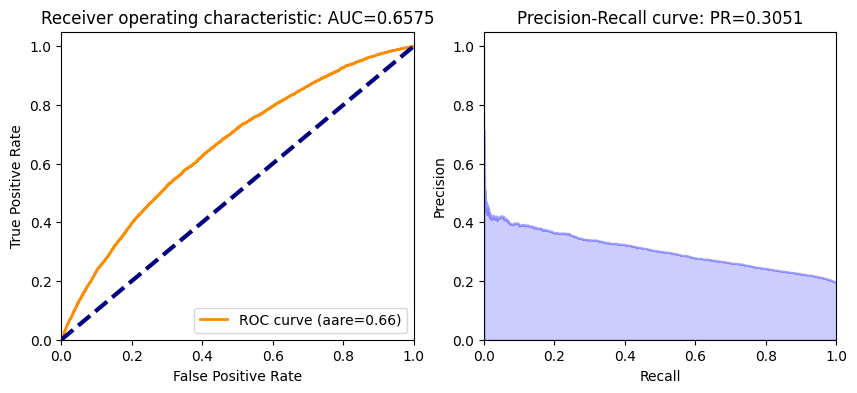

In [72]:
ROC_AUC(rf_v5,test_hex,'loan_default')

In [73]:
createGains(rf_v5)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1179,2021,3200,1179,2021,0.19,0.08,622.4,1.89,11.0,36.84
1,3200,947,2253,6400,2126,4274,0.34,0.17,1244.8,1.71,17.0,33.22
2,3200,809,2391,9600,2935,6665,0.47,0.26,1867.2,1.57,21.0,30.57
3,3200,694,2506,12800,3629,9171,0.58,0.36,2489.6,1.46,22.0,28.35
4,3200,612,2588,16000,4241,11759,0.68,0.46,3112.0,1.36,22.0,26.51
5,3200,521,2679,19200,4762,14438,0.77,0.56,3734.4,1.28,21.0,24.80
6,3200,475,2725,22400,5237,17163,0.84,0.67,4356.8,1.20,17.0,23.38
7,3200,429,2771,25600,5666,19934,0.91,0.77,4979.2,1.14,14.0,22.13
8,3200,346,2854,28800,6012,22788,0.97,0.88,5601.6,1.07,9.0,20.88


In [74]:
rf_v6 = H2ORandomForestEstimator(
        model_id = 'rf_v6',
        ntrees = 48,
        nfolds=10,
        min_rows=100,max_depth = 10, balance_classes = True,
        seed=1234)
rf_v6.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_v6


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,48.0,48.0,115126.0,10.0,10.0,10.0,162.0,202.0,185.95833




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.14837672395119536
RMSE: 0.38519699369438926
MAE: 0.29787304190756436
RMSLE: 0.2700560413420345
Mean Residual Deviance: 0.14837672395119536

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.1482485966412659
RMSE: 0.3850306437691238
MAE: 0.29800740688225424
RMSLE: 0.2698991702631486
Mean Residual Deviance: 0.1482485966412659

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.298006,0.003898,0.296935,0.295008,0.300494,0.302599,0.300258,0.290425,0.294773,0.302669,0.299890,0.297005
1,mean_residual_deviance,0.148248,0.004018,0.146201,0.144980,0.150694,0.152901,0.151622,0.141612,0.143600,0.152469,0.150952,0.147444
2,mse,0.148248,0.004018,0.146201,0.144980,0.150694,0.152901,0.151622,0.141612,0.143600,0.152469,0.150952,0.147444
3,r2,0.047933,0.005741,0.051804,0.044866,0.055070,0.052428,0.041671,0.053715,0.047655,0.042191,0.038730,0.051201
4,residual_deviance,0.148248,0.004018,0.146201,0.144980,0.150694,0.152901,0.151622,0.141612,0.143600,0.152469,0.150952,0.147444
5,rmse,0.384997,0.005230,0.382363,0.380763,0.388193,0.391026,0.389386,0.376314,0.378946,0.390473,0.388525,0.383984
6,rmsle,0.269886,0.002899,0.268503,0.267807,0.271190,0.272774,0.272428,0.264617,0.266969,0.273155,0.272225,0.269187



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-11-22 20:21:56,28.073 sec,0.0,NaN,NaN,NaN
1,,2021-11-22 20:21:56,28.103 sec,1.0,0.390326,0.296830,0.152354
2,,2021-11-22 20:21:56,28.128 sec,2.0,0.388749,0.297316,0.151126
3,,2021-11-22 20:21:56,28.157 sec,3.0,0.387422,0.296804,0.150096
4,,2021-11-22 20:21:56,28.191 sec,4.0,0.387387,0.297274,0.150069
5,,2021-11-22 20:21:56,28.218 sec,5.0,0.387490,0.297683,0.150148
6,,2021-11-22 20:21:56,28.245 sec,6.0,0.386952,0.297483,0.149732
7,,2021-11-22 20:21:56,28.271 sec,7.0,0.386776,0.297592,0.149596
8,,2021-11-22 20:21:56,28.300 sec,8.0,0.387032,0.297804,0.149794
9,,2021-11-22 20:21:56,28.331 sec,9.0,0.386930,0.297894,0.149715



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TD013,2489.526123,1.000000,0.156253
1,AP003,2315.767334,0.930204,0.145347
2,TD009,1829.750366,0.734979,0.114843
3,TD005,1420.152100,0.570451,0.089135
4,MB005,985.035339,0.395672,0.061825
5,CR015,873.679993,0.350942,0.054836
6,PA029,812.043762,0.326184,0.050967
7,TD023,714.445068,0.286980,0.044842
8,TD014,650.076538,0.261125,0.040802
9,TD010,585.657043,0.235248,0.036758



See the whole table with table.as_data_frame()


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



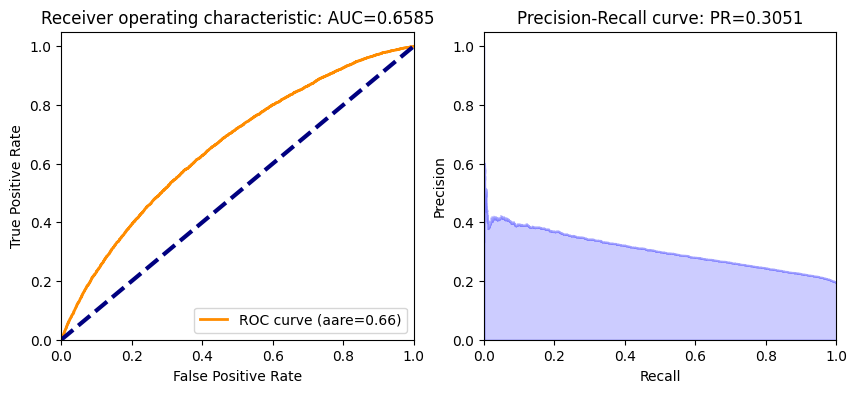

In [75]:
ROC_AUC(rf_v6,test_hex,'loan_default')

In [76]:
createGains(rf_v6)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1185,2015,3200,1185,2015,0.19,0.08,622.4,1.90,11.0,37.03
1,3200,942,2258,6400,2127,4273,0.34,0.17,1244.8,1.71,17.0,33.23
2,3200,810,2390,9600,2937,6663,0.47,0.26,1867.2,1.57,21.0,30.59
3,3200,688,2512,12800,3625,9175,0.58,0.36,2489.6,1.46,22.0,28.32
4,3200,625,2575,16000,4250,11750,0.68,0.46,3112.0,1.37,22.0,26.56
5,3200,530,2670,19200,4780,14420,0.77,0.56,3734.4,1.28,21.0,24.90
6,3200,475,2725,22400,5255,17145,0.84,0.67,4356.8,1.21,17.0,23.46
7,3200,418,2782,25600,5673,19927,0.91,0.77,4979.2,1.14,14.0,22.16
8,3200,344,2856,28800,6017,22783,0.97,0.88,5601.6,1.07,9.0,20.89


Ntrees is set to 48. Now let's explore oversampling and undersampling, and observe how this affects model perfromance.

In [77]:
from imblearn.under_sampling import (RandomUnderSampler, ClusterCentroids,TomekLinks,NeighbourhoodCleaningRule)
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)

In [78]:
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [79]:
y = train[target]
X = train.drop(target,axis=1)

In [80]:
y1_cnt = train[target].sum()
y0_cnt = y1_cnt * 2

### Using Random Undersampling
A simple under-sampling technique is to under-sample the majority class randomly and uniformly. This can potentially lead to loss of information. But if the examples of the majority class are near to others, this method might yield good results.

In [81]:
sampler = RandomUnderSampler(sampling_strategy={1:y1_cnt , 0:  y0_cnt},random_state=9)
X_rs, y_rs = sampler.fit_resample(X, y)

In [82]:
y_rs = y_rs.to_frame()
data = pd.concat([X_rs, y_rs],axis = 1)

In [83]:
train_hex = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [84]:
rf_v7 = H2ORandomForestEstimator(
        model_id = 'rf_v7',
        ntrees = 48,
        nfolds=10,
        min_rows=100,max_depth = 10, balance_classes = True,
        seed=1234)
rf_v7.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_v7


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,48.0,48.0,75969.0,10.0,10.0,10.0,109.0,130.0,121.020836




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.20800320331900776
RMSE: 0.4560736818969143
MAE: 0.41883274484805416
RMSLE: 0.3205284873188819
Mean Residual Deviance: 0.20800320331900776

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.2078208737521528
RMSE: 0.4558737476014086
MAE: 0.41895641150096347
RMSLE: 0.3203195998633143
Mean Residual Deviance: 0.2078208737521528

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.418947,0.003857,0.417999,0.413360,0.416066,0.417467,0.416586,0.416861,0.419723,0.421283,0.424563,0.425560
1,mean_residual_deviance,0.207813,0.004495,0.206690,0.202445,0.204664,0.206018,0.204254,0.205079,0.208206,0.210443,0.213869,0.216461
2,mse,0.207813,0.004495,0.206690,0.202445,0.204664,0.206018,0.204254,0.205079,0.208206,0.210443,0.213869,0.216461
3,r2,0.064564,0.010974,0.072104,0.072252,0.062577,0.065391,0.080194,0.070071,0.059694,0.069737,0.048798,0.044826
4,residual_deviance,0.207813,0.004495,0.206690,0.202445,0.204664,0.206018,0.204254,0.205079,0.208206,0.210443,0.213869,0.216461
5,rmse,0.455841,0.004911,0.454632,0.449939,0.452398,0.453892,0.451945,0.452856,0.456296,0.458740,0.462460,0.465253
6,rmsle,0.320308,0.002372,0.319286,0.317563,0.319380,0.319586,0.318103,0.318927,0.321064,0.320464,0.323833,0.324878



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-11-22 20:23:22,11.840 sec,0.0,NaN,NaN,NaN
1,,2021-11-22 20:23:22,11.855 sec,1.0,0.463511,0.418428,0.214842
2,,2021-11-22 20:23:22,11.867 sec,2.0,0.462710,0.419575,0.214100
3,,2021-11-22 20:23:22,11.879 sec,3.0,0.460338,0.418311,0.211911
4,,2021-11-22 20:23:22,11.892 sec,4.0,0.460396,0.418871,0.211965
5,,2021-11-22 20:23:22,11.912 sec,5.0,0.459902,0.418627,0.211510
6,,2021-11-22 20:23:22,11.933 sec,6.0,0.459586,0.418813,0.211219
7,,2021-11-22 20:23:22,11.946 sec,7.0,0.459257,0.418779,0.210917
8,,2021-11-22 20:23:22,11.960 sec,8.0,0.458900,0.418864,0.210589
9,,2021-11-22 20:23:22,11.975 sec,9.0,0.458401,0.418639,0.210131



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TD013,2830.654297,1.000000,0.171869
1,AP003,2613.388184,0.923245,0.158677
2,TD009,1992.359497,0.703851,0.120970
3,TD005,1510.967407,0.533787,0.091741
4,CR015,948.832092,0.335199,0.057610
5,MB005,885.969360,0.312991,0.053793
6,PA029,760.782471,0.268766,0.046192
7,TD023,734.013489,0.259309,0.044567
8,TD014,723.982788,0.255765,0.043958
9,TD010,537.069336,0.189733,0.032609



See the whole table with table.as_data_frame()


We can observe that using random undersampling has slightly deteriorated the performance. Undersampling is subject to loss of information and this could be the cause of loss off information.

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



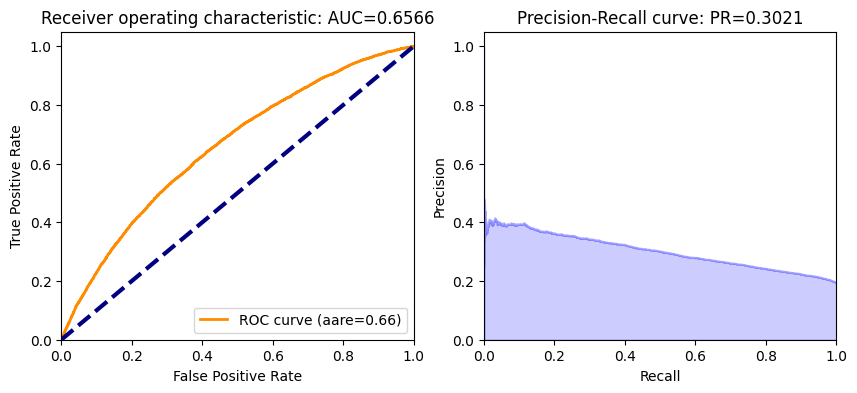

In [85]:
ROC_AUC(rf_v7,test_hex,'loan_default')

In [86]:
createGains(rf_v7)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1172,2028,3200,1172,2028,0.19,0.08,622.4,1.88,11.0,36.62
1,3200,955,2245,6400,2127,4273,0.34,0.17,1244.8,1.71,17.0,33.23
2,3200,805,2395,9600,2932,6668,0.47,0.26,1867.2,1.57,21.0,30.54
3,3200,672,2528,12800,3604,9196,0.58,0.36,2489.6,1.45,22.0,28.16
4,3200,632,2568,16000,4236,11764,0.68,0.46,3112.0,1.36,22.0,26.48
5,3200,529,2671,19200,4765,14435,0.77,0.56,3734.4,1.28,21.0,24.82
6,3200,471,2729,22400,5236,17164,0.84,0.67,4356.8,1.20,17.0,23.38
7,3200,418,2782,25600,5654,19946,0.91,0.77,4979.2,1.14,14.0,22.09
8,3200,349,2851,28800,6003,22797,0.96,0.88,5601.6,1.07,8.0,20.84


### Neighborhood Cleaning Rule
Neighborhood Cleaning Rule (NCL) deals with the majority and minority samples separately when sampling the data sets. NCL uses ENN to remove majority examples. for each instance in the training set, it finds three nearest neighbors. If the instance belongs to the majority class and the classification given by its three nearest neighbors is the opposite of the class of the chosen instance, then the chosen instance is removed. If the chosen instance belongs to the minority class and is misclassified by its three nearest neighbors, then the nearest neighbors that belong to the majority class are removed.

In [87]:
sampler = NeighbourhoodCleaningRule()
X_rs, y_rs = sampler.fit_resample(X, y)

In [88]:
y_rs = y_rs.to_frame()
data1 = pd.concat([X_rs, y_rs],axis = 1)

In [ ]:
train_hex = h2o.H2OFrame(data1)

In [ ]:
rf_v8 = H2ORandomForestEstimator(
        model_id = 'rf_v8',
        ntrees = 48,
        nfolds=10,
        min_rows=100,max_depth = 10, balance_classes = True,
        seed=1234)
rf_v8.train(predictors,target,training_frame=train_hex)

In [ ]:
ROC_AUC(rf_v8,test_hex,'loan_default')

In [ ]:
createGains(rf_v8)

### Random oversampling for the minority class
Random oversampling simply replicates randomly the minority class examples. Random oversampling is known to increase the likelihood of occurring overfitting. On the other hand, the major drawback of Random undersampling is that this method can discard useful data.

In [ ]:
sampler = RandomOverSampler()
X_rs, y_rs = sampler.fit_resample(X, y)

In [ ]:
y_rs = y_rs.to_frame()
data1 = pd.concat([X_rs, y_rs],axis = 1)

In [ ]:
train_hex = h2o.H2OFrame(data1)

In [ ]:
rf_v9 = H2ORandomForestEstimator(
        model_id = 'rf_v9',
        ntrees = 48,
        nfolds=10,
        min_rows=100,max_depth = 10, balance_classes = True,
        seed=1234)
rf_v9.train(predictors,target,training_frame=train_hex)

In [ ]:
ROC_AUC(rf_v9,test_hex,'loan_default')

In [ ]:
createGains(rf_v9)

### Conclusion:
The AUC for the ROC curve has increased, whereas the AUC for the P-R curve has decreased. This suggests that oversampling might not be the best solution to this issue. Overfitting is also a possibility. Undersampling, on the other hand, results in information loss.

Because observations are randomly resampled, random undersampling and oversampling have been shown to be ineffective. Important information might be lost as a result of random undersampling.

With diligent feature engineering, model-based feature selection, and obtaining and applying domain knowledge, model performance may be further enhanced. While conducting this analysis, care must be taken to ensure that no information is lost. To increase prediction skills, the model must be taught to spot abnormalities. Grid search must be carried out thoroughly to find the optimal parameters. These methods would aid in the development of the optimal model.